libelle_abrege_de_liste
EAC                                                                      256
FORTERESSE EUROPE                                                        256
GAUCHE UNIE                                                              256
DEMOCRATIE REPRESENTATIVE                                                256
ESPERANTO                                                                256
FRANCE LIBRE                                                             256
NON À L'UE ET À L'OTAN, COMMUNISTES POUR LA PAIX ET LE PROGRÈS SOCIAL    256
DEFENDRE LES ENFANTS                                                     256
ECOLOGIE POSITIVE                                                        256
NLP                                                                      256
PPL                                                                      256
LFI - UP                                                                 256
HUMANITE SOUVERAINE                                 

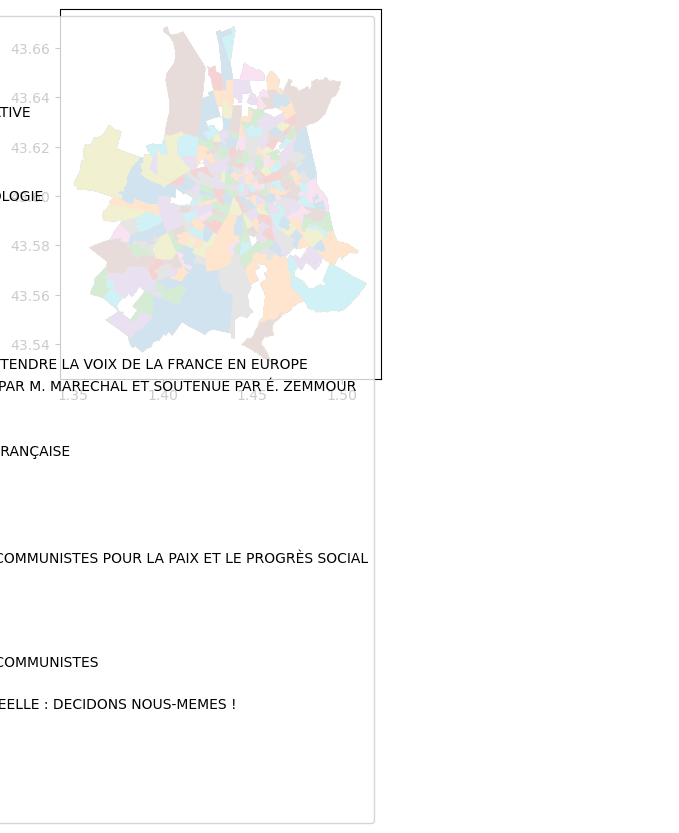

In [1]:
import json
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
import pandas as pd


# Load the JSON file
with open('../data/dataviz-election-europeenne-2024-resultats.json', 'r') as f:
    data = json.load(f)

gdfs = []  # List to store GeoDataFrames

# Iterate over each bureau
for bureau in data:
        
        # Check if the necessary data exists
            
        # Create a GeoDataFrame for this bureau
        if(bureau["geo_shape"] != None):
            geo_shape_json = json.loads(bureau["geo_shape"])
            coordinates = geo_shape_json["coordinates"]
            geometry = Polygon(coordinates[0])

            gdf = gpd.GeoDataFrame(
                [bureau],  # Pass the bureau as a list to create a single-row GeoDataFrame
                geometry=[geometry],  # Pass the geometry as a list
                crs="EPSG:4326",
            )
            gdf['max_voted_person'] = bureau["libelle_abrege_de_liste"]
            gdfs.append(gdf)
# Concatenate all GeoDataFrames into one
all_gdf = pd.concat(gdfs)
print(all_gdf["libelle_abrege_de_liste"].value_counts())
fig, ax = plt.subplots(1, 1)

# Plot the combined GeoDataFrame
all_gdf.plot(column='max_voted_person', ax=ax, legend=True)
plt.show()